**E-mail**

Hi Charles! To help us determine who would be able to fill this role with confidence we are asking our applicants to show their ability to process data from public healthcare sources and provide the business with easy to read data that will help them achieve core business goals. This exercise uses publicly available data that our team is very familiar with and has had several projects directly related to this topic.

 

Goal/Prompt:

 

Coding Challenge #1: For each State that we operate in, on which [week_ending] did the average of our healthcare personal with a completed vaccination exceed 80%?

 

Coding Challenge #2: For each of Our Providers, what is their longest streak (# of weeks) of residents not testing positive for Covid-19 ([residents_weekly_confirmed_covid_19])?

In [1]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import dates as mdates

**Coding Challenge #1: For each State that we operate in, on which [week_ending] did the average of our healthcare personal with a completed vaccination exceed 80%?**

In [2]:
with open('COVID-19 Nursing Home Data 11.21.2021.csv') as covid_csv:
    header = covid_csv.readline().split('",')
    for index, column_name in zip(range(len(header)), header):
        print(index, column_name)

0 "Week Ending
1 "Federal Provider Number
2 "Provider Name
3 "Provider Address
4 "Provider City
5 "Provider State
6 "Provider Zip Code
7 "Provider Phone Number
8 "County
9 "Submitted Data
10 "Passed Quality Assurance Check
11 "Residents Weekly Admissions COVID-19
12 "Residents Total Admissions COVID-19
13 "Residents Weekly Confirmed COVID-19
14 "Residents Total Confirmed COVID-19
15 "Residents Weekly Suspected COVID-19
16 "Residents Total Suspected COVID-19
17 "Residents Weekly All Deaths
18 "Residents Total All Deaths
19 "Residents Weekly COVID-19 Deaths
20 "Residents Total COVID-19 Deaths
21 "Number of All Beds
22 "Total Number of Occupied Beds
23 "Resident Access to Testing in Facility
24 "Laboratory Type Is State Health Dept
25 "Laboratory Type Is Private Lab
26 "Laboratory Type Is Other
27 "Able to Test or Obtain Resources to Test All Current Residents Within Next 7 Days
28 "Reason for Not Testing Residents - Lack of PPE for Personnel
29 "Reason for Not Testing Residents - Lack of

In [3]:
#0 Week Ending
#1 Federal Provider Number
#5 Provider State
#196 Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time
#197 Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time
challenge_1_fields = [0, 1, 5, 197]

In [4]:
df_covid = pd.read_csv('COVID-19 Nursing Home Data 11.21.2021.csv', 
                       usecols=challenge_1_fields, 
                       dtype={'Federal Provider Number': str,
                              'Provider State': str,
                              #'Recent Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time': np.float64,
                              'Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time': np.float64},
                       parse_dates = [0])

In [5]:
df_providers = pd.read_csv('Our_Provider_numbers.csv', sep='\t')
df_providers.replace(',', '', regex=True, inplace=True)
df_providers

,"our affilitied federal provider numbers,,,,"
0,035014
1,035068
2,035070
3,035071
4,035072
...,...
226,676413
227,676421
228,676426
229,676432


In [6]:
df_covid = df_covid[df_covid['Federal Provider Number'].isin(df_providers['our affilitied federal provider numbers,,,,'])]
df_covid

,Week Ending,Federal Provider Number,Provider State,Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time
19764,2020-05-24,035014,AZ,NaN
19765,2020-05-31,035014,AZ,NaN
19766,2020-06-07,035014,AZ,NaN
19767,2020-06-14,035014,AZ,NaN
19768,2020-06-21,035014,AZ,NaN
...,...,...,...,...
1206723,2021-10-24,676459,TX,70.968
1206724,2021-10-31,676459,TX,69.841
1206725,2021-11-07,676459,TX,65.625
1206726,2021-11-14,676459,TX,63.636


In [7]:
#df_80plus = df_covid[df_covid['Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time'] > 80]
df_covid.isna().sum()

Week Ending                                                                                                 0
Federal Provider Number                                                                                     0
Provider State                                                                                              0
Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time    11718
dtype: int64

In [8]:
#keeping provider number for example breakdown
#df_covid.drop('Federal Provider Number', axis=1, inplace=True)
df_covid.dropna(inplace=True)
df_covid.rename({'Percentage of Current Healthcare Personnel who Received a Completed COVID-19 Vaccination at Any Time' : 'Percentage'}, axis=1, inplace=True)
df_covid

,Week Ending,Federal Provider Number,Provider State,Percentage
19819,2021-06-13,035014,AZ,46.914
19820,2021-06-20,035014,AZ,47.500
19821,2021-06-27,035014,AZ,45.783
19822,2021-07-04,035014,AZ,43.023
19823,2021-07-11,035014,AZ,43.023
...,...,...,...,...
1206723,2021-10-24,676459,TX,70.968
1206724,2021-10-31,676459,TX,69.841
1206725,2021-11-07,676459,TX,65.625
1206726,2021-11-14,676459,TX,63.636


In [9]:
df_80plus = df_covid[df_covid['Percentage'] > 80]

In [10]:
df_80plus

,Week Ending,Federal Provider Number,Provider State,Percentage
20468,2021-10-10,035072,AZ,81.111
20469,2021-10-17,035072,AZ,83.544
20470,2021-10-24,035072,AZ,87.821
20471,2021-10-31,035072,AZ,87.730
20472,2021-11-07,035072,AZ,84.426
...,...,...,...,...
1196016,2021-10-24,676312,TX,88.350
1196017,2021-10-31,676312,TX,87.255
1196018,2021-11-07,676312,TX,86.275
1196019,2021-11-14,676312,TX,85.294


In [11]:
df_80plus.groupby('Provider State')['Week Ending'].min()

Provider State
AZ   2021-10-10
CA   2021-05-30
CO   2021-06-06
ID   2021-06-06
NE   2021-06-27
NV   2021-07-04
TX   2021-06-06
UT   2021-07-18
WA   2021-06-20
Name: Week Ending, dtype: datetime64[ns]

In [12]:
print(df_80plus.groupby(['Provider State', 'Federal Provider Number'])['Week Ending'].min().to_string())

Provider State  Federal Provider Number
AZ              035072                    2021-10-10
CA              055067                    2021-06-27
                055182                    2021-10-03
                055237                    2021-08-15
                055353                    2021-06-06
                055394                    2021-06-13
                055430                    2021-06-06
                055505                    2021-08-29
                055519                    2021-08-29
                055570                    2021-06-06
                055632                    2021-06-20
                055689                    2021-06-06
                055706                    2021-06-13
                055734                    2021-08-29
                055756                    2021-06-06
                055830                    2021-06-13
                055890                    2021-06-13
                055987                    2021-06-06
      

In [13]:
#print(df_covid[df_covid['Provider State'] == 'AZ'].to_string())
print(df_80plus[df_80plus['Provider State'] == 'AZ'].sort_values(by='Week Ending').to_string())

      Week Ending Federal Provider Number Provider State  Percentage
20468  2021-10-10                  035072             AZ      81.111
20469  2021-10-17                  035072             AZ      83.544
20470  2021-10-24                  035072             AZ      87.821
20471  2021-10-31                  035072             AZ      87.730
20472  2021-11-07                  035072             AZ      84.426
20473  2021-11-14                  035072             AZ      82.203


In [14]:
df_covid['Provider State'].nunique()

13

In [15]:
states = df_covid['Provider State'].unique()

In [16]:
df_avg = df_covid.groupby(['Week Ending', 'Provider State']).mean()
df_avg

Percentage
Week Ending Provider State            
2021-05-30  CA               68.265500
            CO               54.040000
            ID               40.351000
            SC               70.833000
            TX               49.378500
...                                ...
2021-11-21  SC               55.524250
            TX               65.752113
            UT               67.064000
            WA               88.666818
            WI               55.532000

[331 rows x 1 columns]

In [17]:
df_max = df_covid.groupby(['Week Ending', 'Provider State']).max()
df_max

Federal Provider Number  Percentage
Week Ending Provider State                                    
2021-05-30  CA                              555739      93.750
            CO                              065100      54.040
            ID                              135129      40.351
            SC                              425159      70.833
            TX                              676023      69.725
...                                            ...         ...
2021-11-21  SC                              425391      71.000
            TX                              676459      92.553
            UT                              465188      80.851
            WA                              505434      99.259
            WI                              525497      56.897

[331 rows x 2 columns]

In [18]:
df_avg_provider = df_covid.groupby(['Week Ending', 'Provider State', 'Federal Provider Number']).mean()
df_avg_provider

Percentage
Week Ending Provider State Federal Provider Number            
2021-05-30  CA             055237                       68.548
                           056401                       39.796
                           555259                       70.968
                           555739                       93.750
            CO             065100                       54.040
...                                                        ...
2021-11-21  WA             505325                       80.769
                           505407                       79.121
                           505434                       87.805
            WI             525348                       54.167
                           525497                       56.897

[5188 rows x 1 columns]

Text(0, 0.5, 'Percentage')

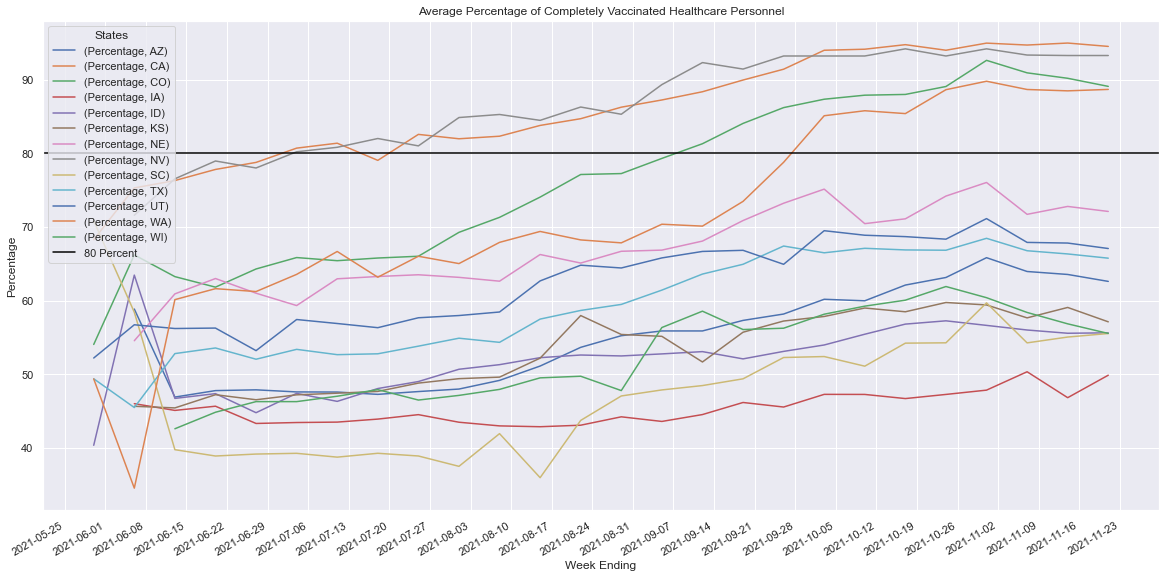

In [19]:
sns.set()

fig, ax = plt.subplots(figsize=(20,10))

title = 'Average Percentage of Completely Vaccinated Healthcare Personnel'
df_avg.unstack().plot(ax=ax,x_compat=True, title=title)

ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.axhline(80, color='black', label='80 Percent')
plt.legend(title='States')
plt.ylabel('Percentage')
#plt.savefig('Q1 ' + title)

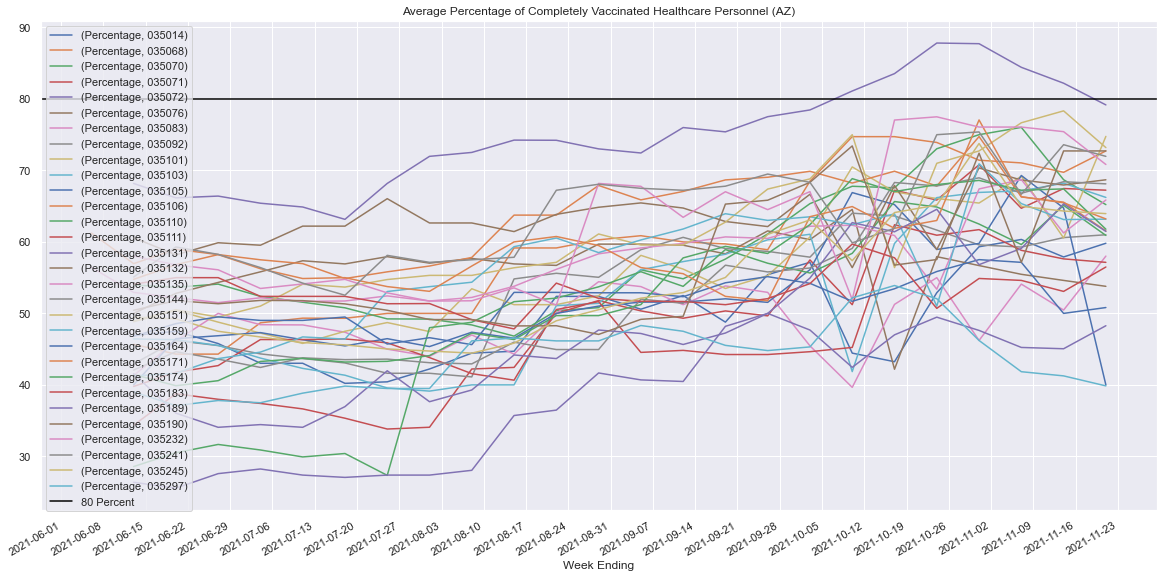

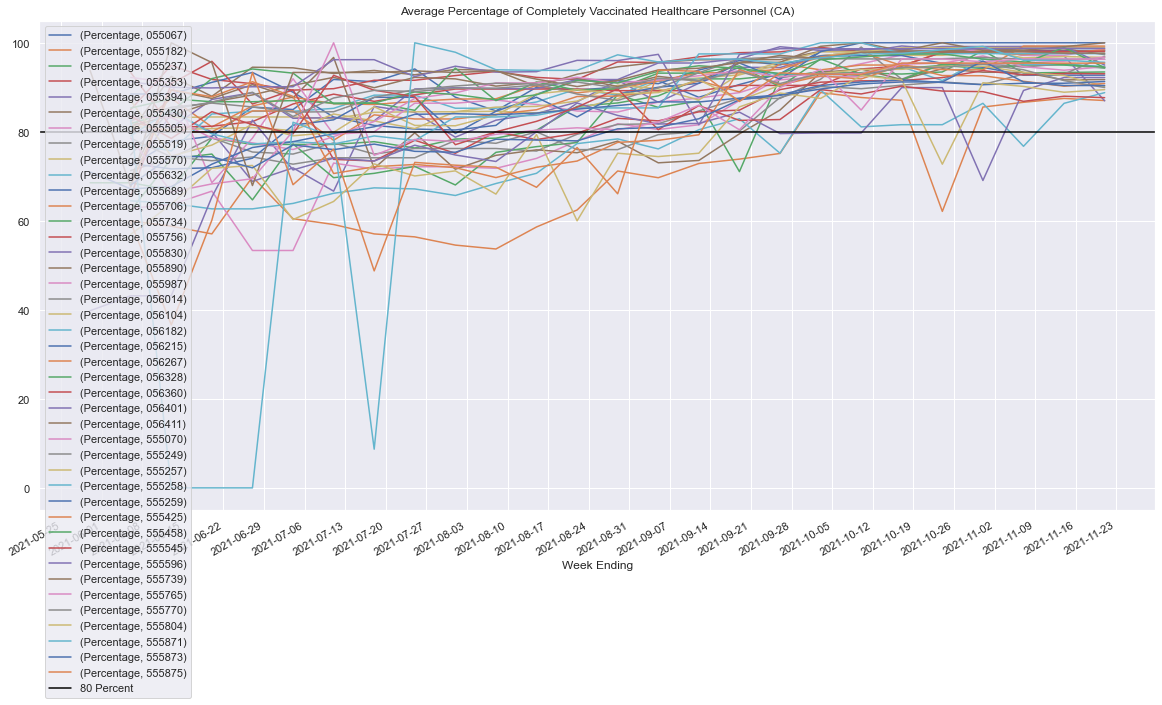

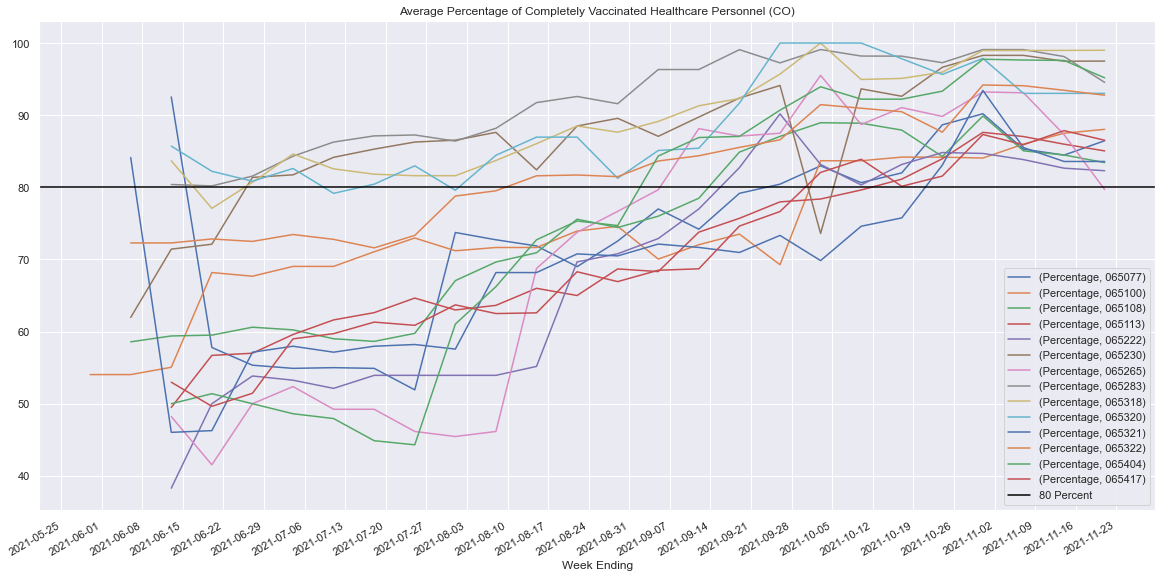

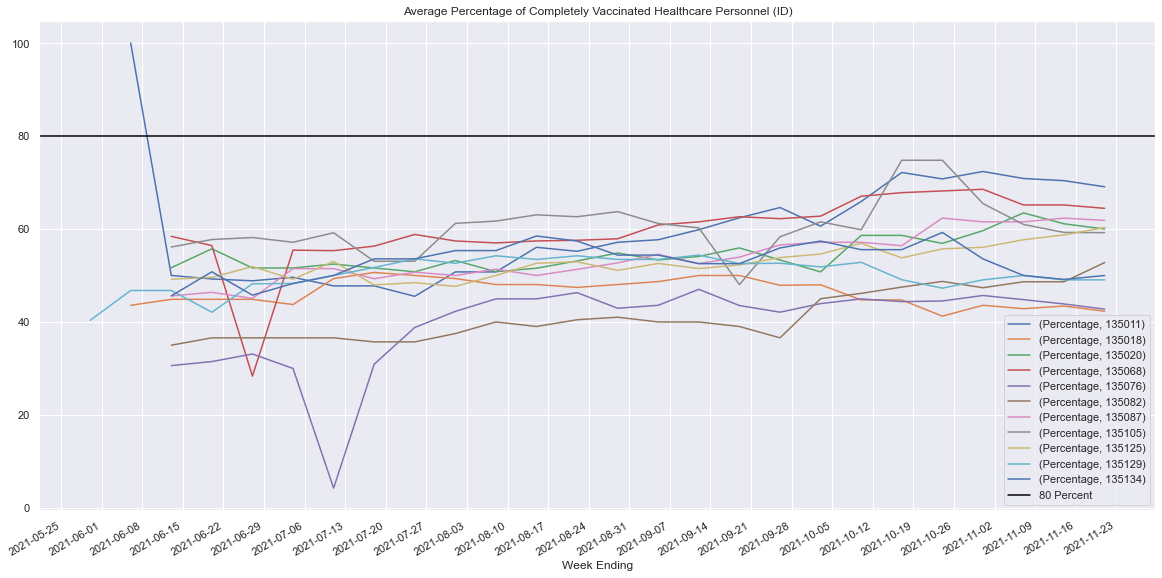

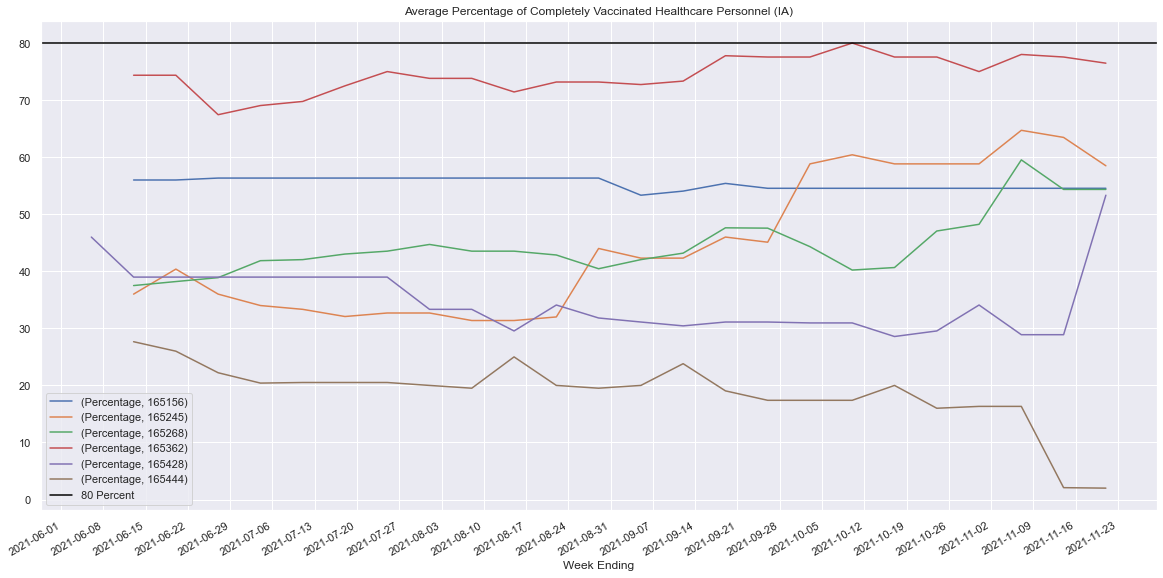

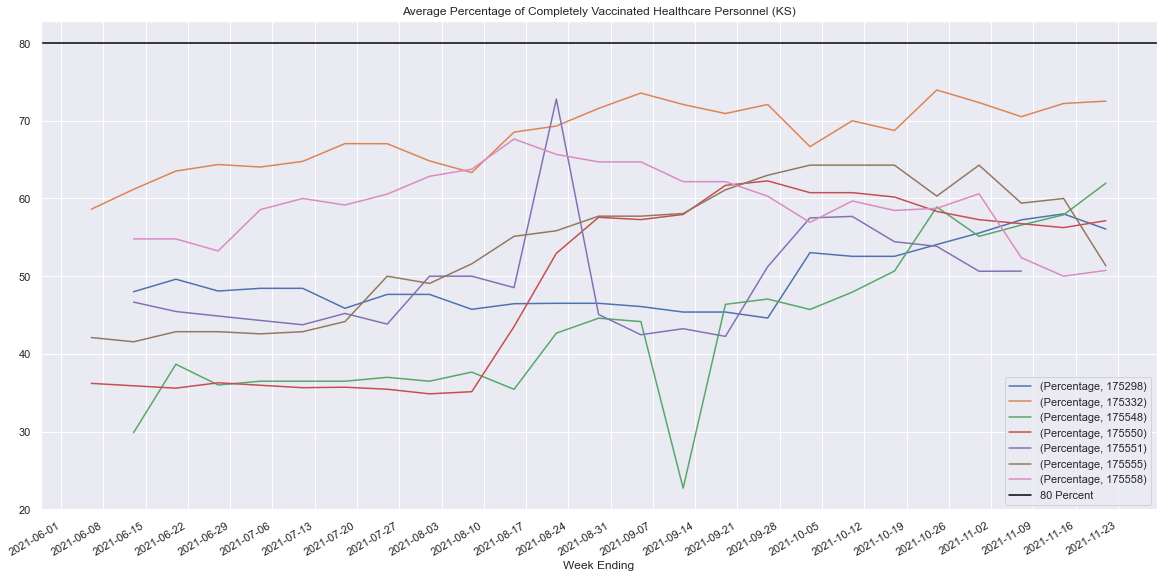

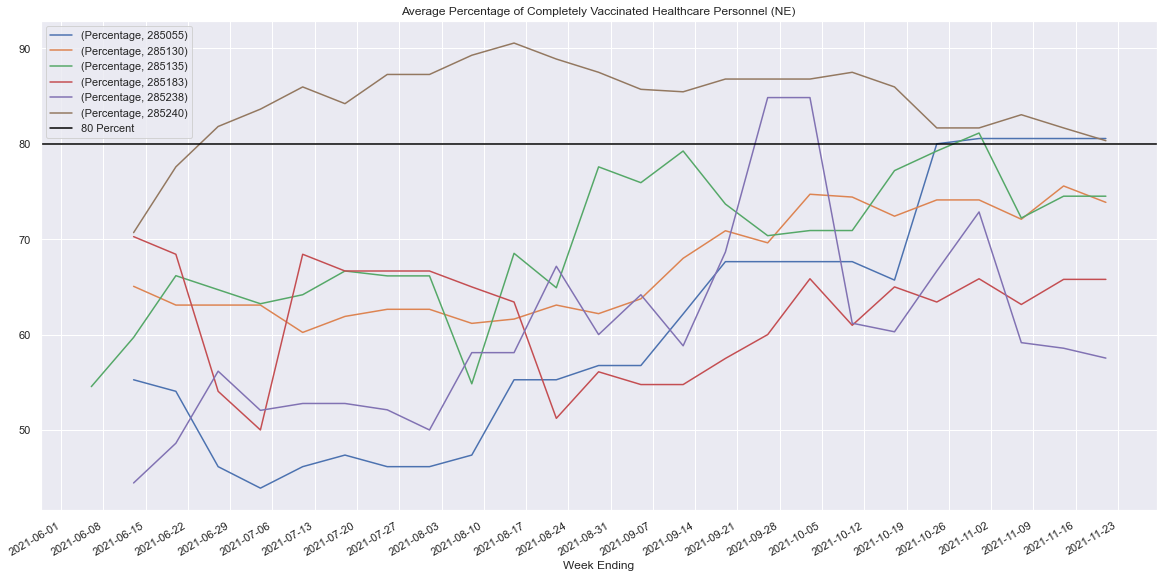

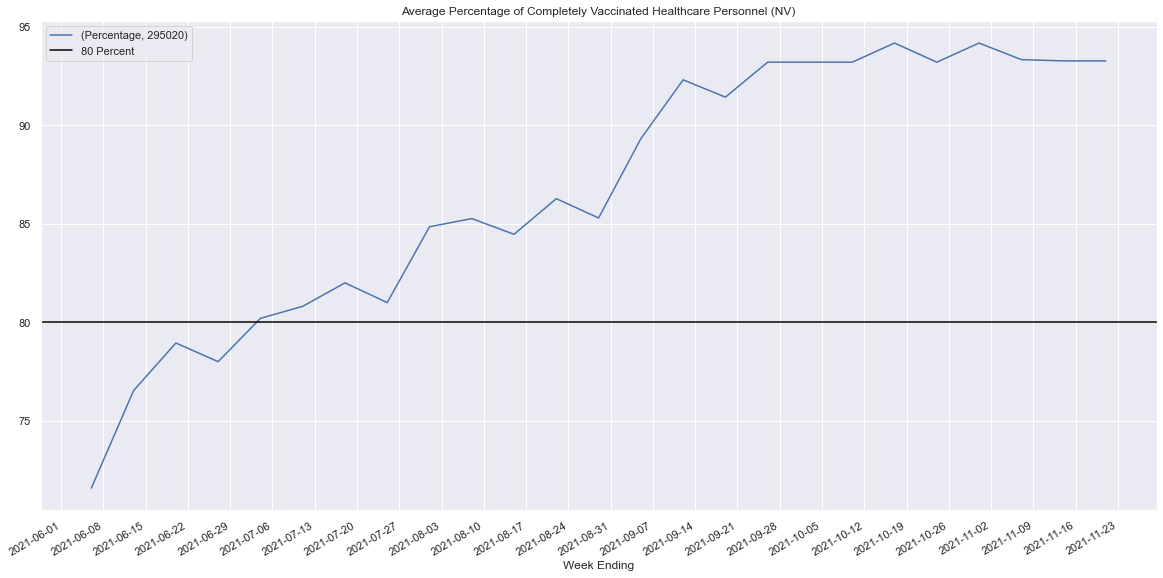

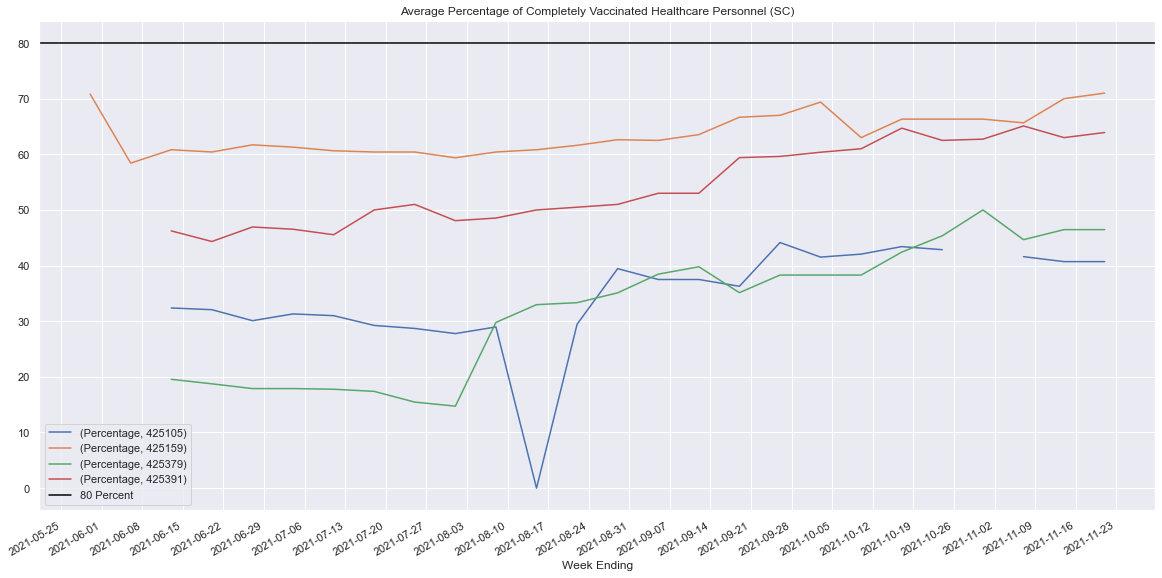

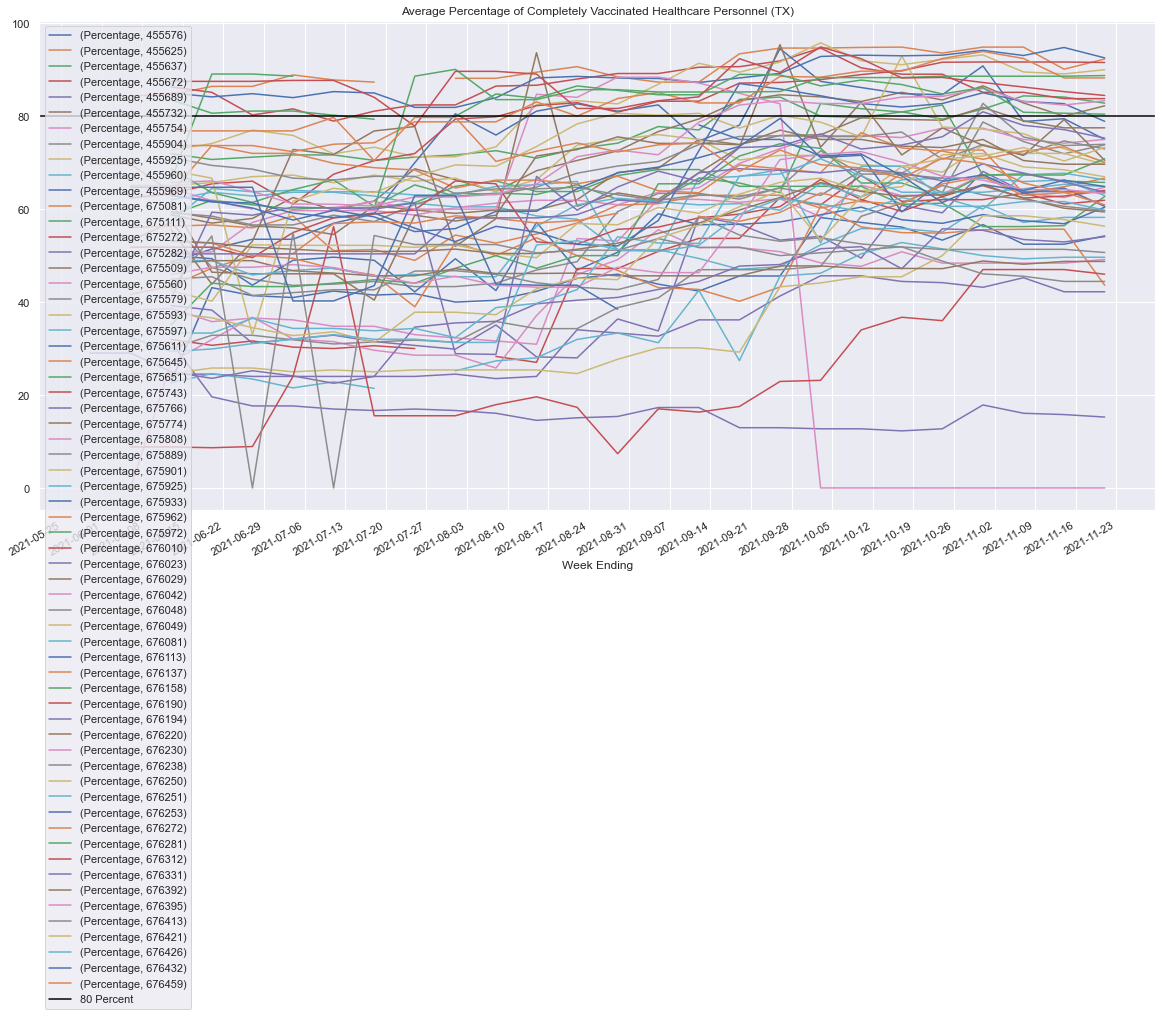

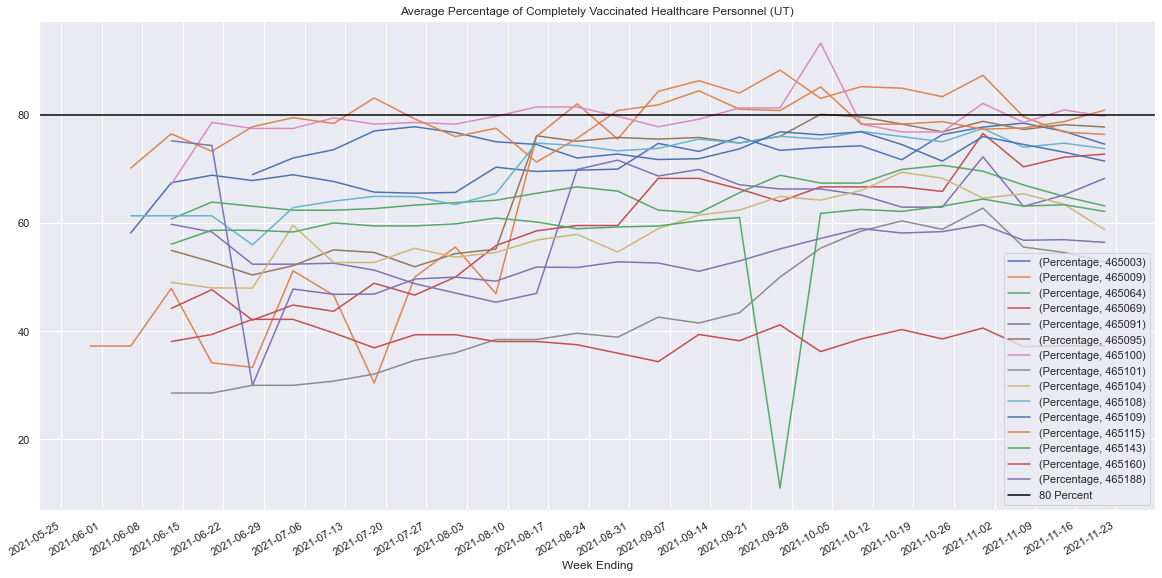

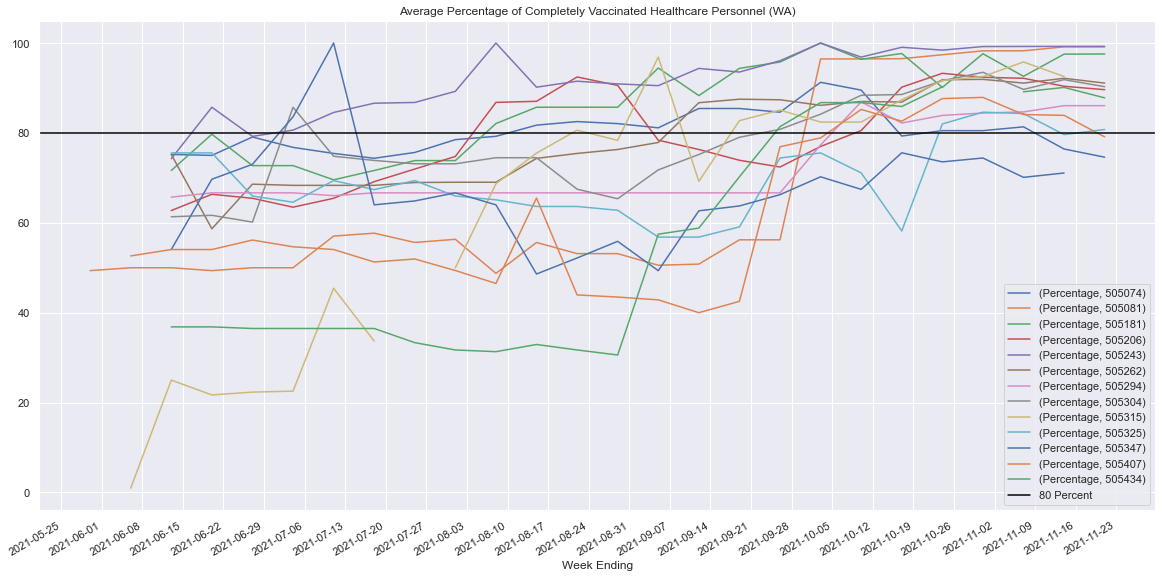

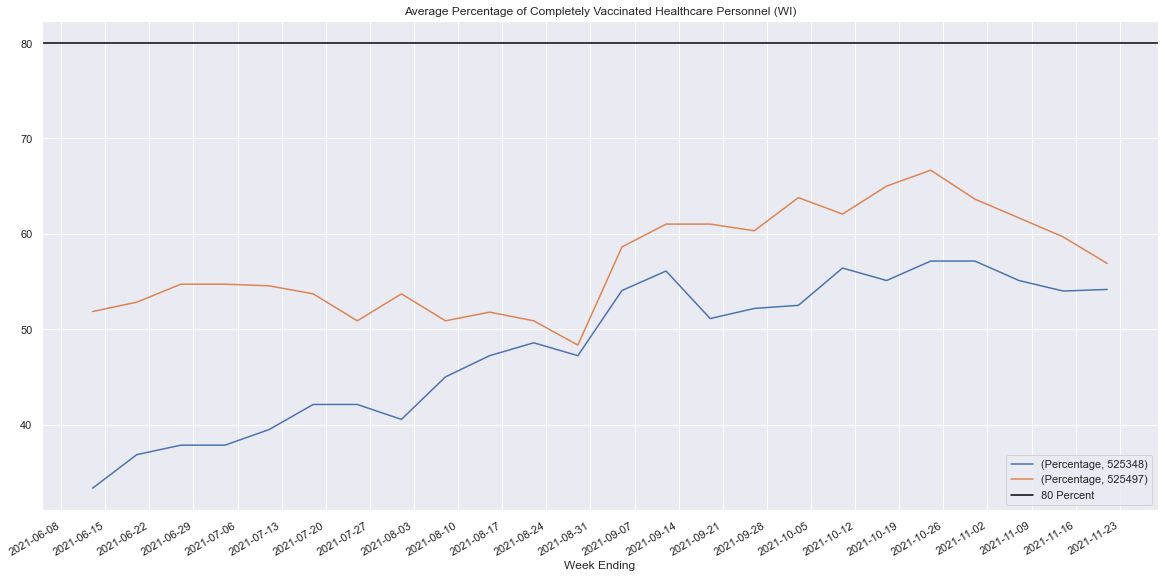

In [20]:
for state in states:
    state_df = df_covid[df_covid['Provider State'] == state]
    state_avg_provider_df = state_df.groupby(['Week Ending', 'Federal Provider Number']).mean()
    fig1, ax1 = plt.subplots(figsize=(20,10))

    state_avg_provider_df.unstack().plot(ax=ax1, x_compat=True, title=title + ' (' + state + ')')
    ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
    ax1.axhline(80, color='black', label='80 Percent')
    ax1.legend()
    #plt.savefig('Q1 ' + title + ' (' + state + ')')

## **Coding Challenge #1: For each State that we operate in, on which [week_ending] did the average of our healthcare personal with a completed vaccination exceed 80%?** ##

## **Answer: Taking the averages of all providers, the only states that had an average over 80% are CA, CO, NV, WA. Respectively, they exceeded 80% on 2021-07-04, 2021-09-12, 2021-07-04, and 2021-10-03.** ##

## **Looking closer at the data, certain providers for some states had percentages over 80%. However, other providers in those states had lower rates, which brings the average down when considering all of them. An example is NE which has one provider which consistently exceeds 80% completed vaccination rate.** ##

In [21]:
#df_avg = df_covid.groupby(['Week Ending', 'Provider State']).mean()
df_avg_80plus = df_avg[df_avg['Percentage'] > 80]
df_avg_80plus.reset_index().groupby('Provider State')['Week Ending'].min()

Provider State
CA   2021-07-04
CO   2021-09-12
NV   2021-07-04
WA   2021-10-03
Name: Week Ending, dtype: datetime64[ns]

**Coding Challenge #2: For each of Our Providers, what is their longest streak (# of weeks) of residents not testing positive for Covid-19 ([residents_weekly_confirmed_covid_19])?**

In [22]:
#0 Week Ending
#1 Federal Provider Number
#5 Provider State
#13 Residents Weekly Confirmed COVID-19
challenge_2_fields = [0, 1, 5, 13]
df_covid2 = pd.read_csv('COVID-19 Nursing Home Data 11.21.2021.csv', 
                       usecols=challenge_2_fields, 
                       dtype={'Federal Provider Number': str,
                              'Provider State': str,
                              'Residents Weekly Confirmed COVID-19': np.float64},
                       parse_dates = [0])

In [23]:
df_covid2 = df_covid2[df_covid2['Federal Provider Number'].isin(df_providers['our affilitied federal provider numbers,,,,'])]
df_covid2

,Week Ending,Federal Provider Number,Provider State,Residents Weekly Confirmed COVID-19
19764,2020-05-24,035014,AZ,1.0
19765,2020-05-31,035014,AZ,2.0
19766,2020-06-07,035014,AZ,5.0
19767,2020-06-14,035014,AZ,7.0
19768,2020-06-21,035014,AZ,0.0
...,...,...,...,...
1206723,2021-10-24,676459,TX,0.0
1206724,2021-10-31,676459,TX,0.0
1206725,2021-11-07,676459,TX,0.0
1206726,2021-11-14,676459,TX,0.0


In [24]:
#df_covid2.dropna(inplace=True)
df_covid2.rename({'Residents Weekly Confirmed COVID-19' : 'Weekly Confirmed'}, axis=1, inplace=True)
df_covid2

,Week Ending,Federal Provider Number,Provider State,Weekly Confirmed
19764,2020-05-24,035014,AZ,1.0
19765,2020-05-31,035014,AZ,2.0
19766,2020-06-07,035014,AZ,5.0
19767,2020-06-14,035014,AZ,7.0
19768,2020-06-21,035014,AZ,0.0
...,...,...,...,...
1206723,2021-10-24,676459,TX,0.0
1206724,2021-10-31,676459,TX,0.0
1206725,2021-11-07,676459,TX,0.0
1206726,2021-11-14,676459,TX,0.0


In [25]:
df_covid2.isna().sum()

Week Ending                 0
Federal Provider Number     0
Provider State              0
Weekly Confirmed           86
dtype: int64

In [26]:
df_covid2['not_eq_shift'] = df_covid2['Weekly Confirmed'] != df_covid2.groupby(['Federal Provider Number'])['Weekly Confirmed'].shift()

In [27]:
not_eq_shift = (df_covid2['Weekly Confirmed'] != df_covid2.groupby(['Federal Provider Number'])['Weekly Confirmed'].shift())

In [28]:
df_covid2['Streak'] = df_covid2['Weekly Confirmed'].groupby(not_eq_shift.cumsum()).cumcount() + 1
#df_covid2['Streak'] = df_covid2['Weekly Confirmed'].groupby((df_covid2['Weekly Confirmed'] != df_covid2.groupby(['Federal Provider Number'])['Weekly Confirmed'].shift()).cumsum()).cumcount()

In [29]:
print(df_covid2[df_covid2['Weekly Confirmed'] == 0].groupby('Federal Provider Number')['Streak'].max().to_string())

Federal Provider Number
035014    26
035068    14
035070    11
035071    40
035072    25
035076    43
035083    29
035092    39
035101    36
035103    17
035105    21
035106    33
035110    22
035111    28
035131    70
035132    33
035135    19
035144    27
035151    31
035159    16
035164    30
035171    28
035174    25
035183    35
035189    65
035190    19
035232    28
035241    30
035245    41
035297    36
055067    41
055182    42
055237    20
055353    44
055394    42
055430    43
055505    29
055519    40
055570    30
055632    35
055689    42
055706    39
055734    34
055756    38
055830    44
055890    41
055987    19
056014    29
056104    46
056182    42
056215    44
056267    42
056328    36
056360    43
056401    42
056411    25
065077    23
065100    27
065108    24
065113    21
065222    40
065230    51
065265    28
065283    26
065318    57
065320    46
065321    52
065322    37
065404    53
065417    25
135011    47
135018    27
135020    40
135068    45
135076    28
1

In [30]:
print(df_covid2[df_covid2['Weekly Confirmed'] == 0].groupby('Federal Provider Number')['Streak'].max().reset_index().to_string(index=False))

Federal Provider Number  Streak
                 035014      26
                 035068      14
                 035070      11
                 035071      40
                 035072      25
                 035076      43
                 035083      29
                 035092      39
                 035101      36
                 035103      17
                 035105      21
                 035106      33
                 035110      22
                 035111      28
                 035131      70
                 035132      33
                 035135      19
                 035144      27
                 035151      31
                 035159      16
                 035164      30
                 035171      28
                 035174      25
                 035183      35
                 035189      65
                 035190      19
                 035232      28
                 035241      30
                 035245      41
                 035297      36
        

In [31]:
df_covid2[df_covid2['Weekly Confirmed'] == 0].groupby('Federal Provider Number')['Streak'].max().reset_index().to_csv('Q2 Longest Streak.csv', index=False)